In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import time
import seaborn as sns 
%matplotlib inline

In [3]:
df_train = pd.read_csv("../8th_week/data/train2.csv")
df_test = pd.read_csv("../8th_week/data/test2.csv")
df_train.head()
#df_test.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 647054 non-null int64
VisitNumber              647054 non-null int64
Weekday                  647054 non-null object
Upc                      642925 non-null float64
ScanCount                647054 non-null int64
DepartmentDescription    645693 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB


In [5]:
df_train["TripType"].value_counts()

40     174164
39      95504
37      38954
38      29565
25      27609
7       23199
8       22844
36      21990
44      20424
42      19468
24      18015
999     17590
9       16820
32      13843
5       13836
35      12501
33       9918
15       7147
3        6827
43       6383
41       5508
30       4861
34       4751
27       4613
21       4032
22       3592
6        3405
20       3116
18       2977
28       2664
26       2507
12       2108
29       2105
31       1765
19       1188
4         901
23        325
14         35
Name: TripType, dtype: int64

(array([0.00976722, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00027294]),
 array([  3. , 102.6, 202.2, 301.8, 401.4, 501. , 600.6, 700.2, 799.8,
        899.4, 999. ]),
 <a list of 10 Patch objects>)

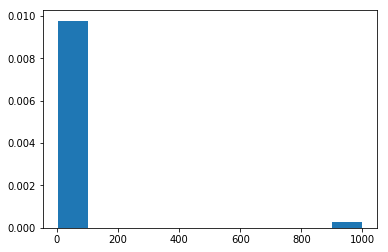

In [6]:
plt.hist(df_train.TripType, normed=True)

In [7]:
df_train["VisitNumber"].value_counts() ### personal number

72439     209
88011     151
9181      113
60971     112
65792     111
80318     104
178154     98
181457     97
84786      97
59358      96
179810     94
78556      94
79977      94
143651     93
170029     93
97101      91
105804     91
92740      89
139425     89
74005      89
119639     89
49461      86
107756     86
145744     86
36506      86
58240      85
105052     84
55716      83
80051      82
94422      82
         ... 
106065      1
43808       1
80658       1
7777        1
119567      1
121614      1
38183       1
134516      1
69908       1
38000       1
76051       1
117007      1
114958      1
121101      1
112897      1
151420      1
161659      1
145267      1
143216      1
188270      1
28472       1
93263       1
57134       1
50989       1
61224       1
67349       1
117851      1
148861      1
23657       1
2047        1
Name: VisitNumber, Length: 95674, dtype: int64

In [8]:
df_train["Weekday"].value_counts()

Sunday       133975
Saturday     122096
Friday        96247
Monday        83130
Tuesday       72529
Wednesday     71115
Thursday      67962
Name: Weekday, dtype: int64

(array([0.24791079, 0.21412432, 0.        , 0.31449204, 0.        ,
        0.34508969, 0.17505494, 0.        , 0.18681851, 0.18317637]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

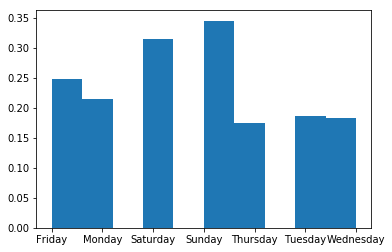

In [9]:
plt.hist(df_train.Weekday, normed=True)

In [10]:
df_train["Upc"].value_counts()

4.011000e+03    7657
6.053886e+10    2501
7.874235e+09    2067
7.874235e+09    1883
4.046000e+03    1652
6.811311e+10    1515
6.053887e+10    1487
3.338320e+09    1405
4.087000e+03    1370
6.053887e+10    1343
4.900000e+09    1018
4.062000e+03     973
4.065000e+03     953
4.900003e+09     896
3.338365e+09     856
7.874235e+09     828
4.900005e+09     815
6.811316e+10     778
6.053890e+10     778
4.078000e+03     750
6.992216e+10     745
7.874211e+09     719
4.093000e+03     698
4.900001e+09     697
2.096650e+10     686
6.053882e+10     644
7.874235e+09     622
4.051000e+03     620
7.225004e+09     618
3.151000e+03     561
                ... 
7.413001e+09       1
8.806156e+11       1
7.278511e+09       1
7.144151e+10       1
6.811311e+10       1
7.169143e+09       1
7.583857e+10       1
7.943761e+10       1
7.871544e+09       1
2.700042e+09       1
7.659406e+10       1
7.163396e+07       1
7.595452e+10       1
7.617070e+10       1
8.434540e+10       1
7.575587e+10       1
4.402124e+09 

In [11]:
df_train["FinelineNumber"].value_counts()

5501.0    8244
1508.0    5121
135.0     4538
808.0     4401
0.0       3837
9546.0    2997
1407.0    2848
4606.0    2753
115.0     2723
203.0     2639
100.0     2634
3004.0    2607
4010.0    2531
3601.0    2465
3600.0    2455
110.0     2237
3120.0    2074
3555.0    2056
8101.0    2037
5017.0    1980
801.0     1946
7010.0    1935
5620.0    1896
202.0     1895
9100.0    1885
4624.0    1834
3467.0    1751
7955.0    1749
9101.0    1721
3702.0    1655
          ... 
6213.0       1
2289.0       1
5380.0       1
8539.0       1
7231.0       1
4314.0       1
5578.0       1
8554.0       1
1152.0       1
7773.0       1
8565.0       1
6177.0       1
1765.0       1
5564.0       1
238.0        1
5217.0       1
5218.0       1
3496.0       1
1791.0       1
3492.0       1
7159.0       1
5518.0       1
2861.0       1
6227.0       1
4495.0       1
2311.0       1
524.0        1
7130.0       1
2847.0       1
7313.0       1
Name: FinelineNumber, Length: 5195, dtype: int64

In [12]:
df_train["DepartmentDescription"].value_counts()

GROCERY DRY GOODS              70402
DSD GROCERY                    68332
PRODUCE                        51115
DAIRY                          43820
PERSONAL CARE                  41969
IMPULSE MERCHANDISE            28712
HOUSEHOLD CHEMICALS/SUPP       24880
PHARMACY OTC                   23306
FROZEN FOODS                   21101
HOUSEHOLD PAPER GOODS          16274
COMM BREAD                     15244
BEAUTY                         14865
MENS WEAR                      12250
FINANCIAL SERVICES             10723
INFANT CONSUMABLE HARDLINES    10646
SERVICE DELI                   10127
CANDY, TOBACCO, COOKIES         9808
PETS AND SUPPLIES               9761
MEAT - FRESH & FROZEN           9477
PRE PACKED DELI                 9052
LADIESWEAR                      8721
CELEBRATION                     8698
COOK AND DINE                   7600
BAKERY                          7168
OFFICE SUPPLIES                 6578
HOME MANAGEMENT                 6349
TOYS                            6107
S

(array([0.00797779, 0.00635323, 0.03256206, 0.02548519, 0.01892628,
        0.0077421 , 0.00797188, 0.01813468, 0.0167099 , 0.00519572]),
 array([-1. ,  5.8, 12.6, 19.4, 26.2, 33. , 39.8, 46.6, 53.4, 60.2, 67. ]),
 <a list of 10 Patch objects>)

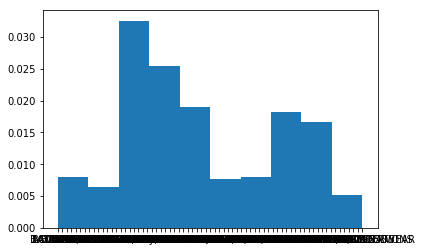

In [13]:
plt.hist(df_train.DepartmentDescription, normed=True)

In [14]:
pivot_table = pd.pivot_table(df_train, index=["VisitNumber"], columns=["DepartmentDescription"], fill_value=0, aggfunc=len, margins=True)

In [15]:
pivot_table.query('VisitNumber == 12')

FinelineNumber                                \
DepartmentDescription     1-HR PHOTO ACCESSORIES AUTOMOTIVE BAKERY   
VisitNumber                                                          
12                                 0           0          0      0   

                                                                          \
DepartmentDescription BATH AND SHOWER BEAUTY BEDDING BOOKS AND MAGAZINES   
VisitNumber                                                                
12                                  0      0       0                   0   

                                                 ...   Weekday               \
DepartmentDescription BOYS WEAR BRAS & SHAPEWEAR ...  SEASONAL SERVICE DELI   
VisitNumber                                      ...                          
12                            2                0 ...         0            0   

                                                                 \
DepartmentDescription SHEER HOSIERY SHOES SLEEPWEAR/FOUNDATIONS   
VisitNumber                                                       
12                                0     1                     0   

                                                                            
DepartmentDescription SPORTING GOODS SWIMWEAR/OUTERWEAR TOYS WIRELESS  All  
VisitNumber                                                                 
12                                 0                  0    0        0  7.0  

[1 rows x 345 columns]

In [18]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(pivot_table, min_support=0.07, use_colnames=True)


/anaconda3/lib/python3.6/site-packages/mlxtend/frequent_patterns/apriori.py:102: RuntimeWarning: invalid value encountered in greater_equal
  support_dict = {1: support[support >= min_support]}
/anaconda3/lib/python3.6/site-packages/mlxtend/frequent_patterns/apriori.py:103: RuntimeWarning: invalid value encountered in greater_equal
  itemset_dict = {1: ary_col_idx[support >= min_support].reshape(-1, 1)}


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()